In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv("DoctorVisits - DA.csv")
print(df.head(15))

    Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
0            1       1  female  0.19    0.55        1        4       1   
1            2       1  female  0.19    0.45        1        2       1   
2            3       1    male  0.19    0.90        3        0       0   
3            4       1    male  0.19    0.15        1        0       0   
4            5       1    male  0.19    0.45        2        5       1   
5            6       1  female  0.19    0.35        5        1       9   
6            7       1  female  0.19    0.55        4        0       2   
7            8       1  female  0.19    0.15        3        0       6   
8            9       1  female  0.19    0.65        2        0       5   
9           10       1    male  0.19    0.15        1        0       0   
10          11       1    male  0.19    0.45        1        0       0   
11          12       1    male  0.19    0.25        2        0       2   
12          13       2    male  0.19  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [8]:
illness_counts = df["illness"].value_counts()
print(illness_counts)

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64


In [9]:
result = df.groupby(['gender'])['reduced'].agg(['mean', 'std'])
print(result)

            mean       std
gender                    
female  0.975574  3.080338
male    0.738344  2.657705


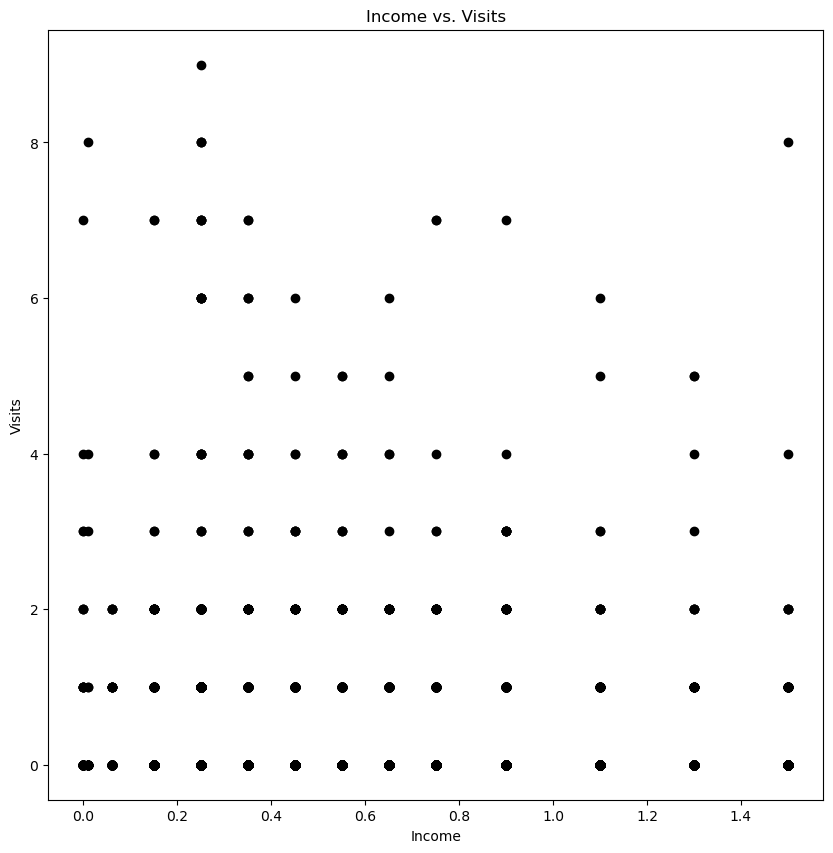

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(x='income', y='visits', data=df, color='black', marker='o')
plt.xlabel('Income')
plt.ylabel('Visits')
plt.title('Income vs. Visits')
plt.show()

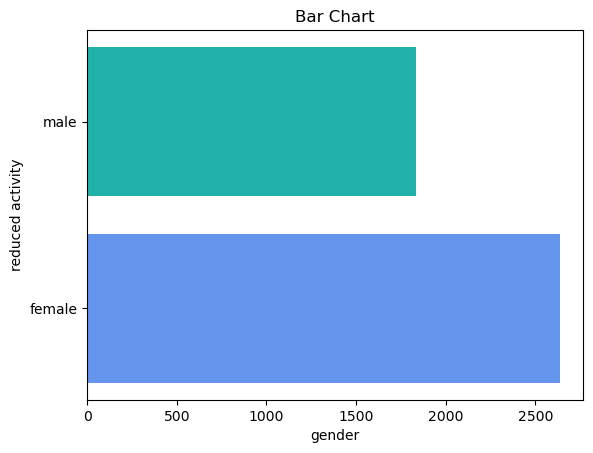

In [13]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])
plt.title('Bar Chart')
plt.xlabel('gender')
plt.ylabel('reduced activity')
plt.show()

<Axes: >

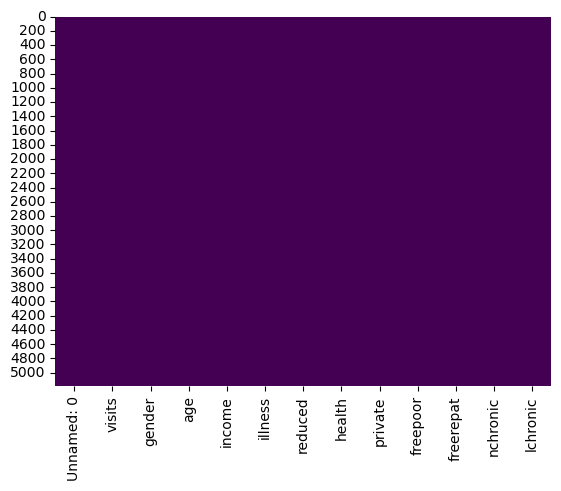

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

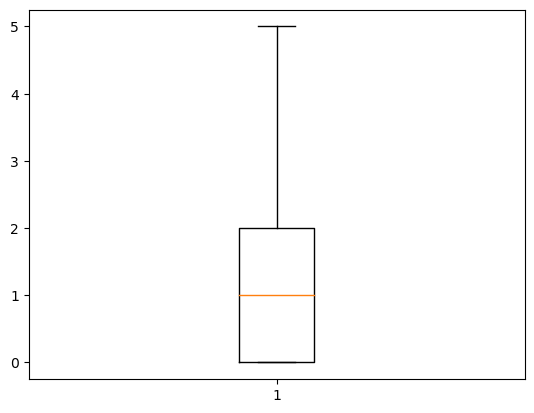

In [16]:
y=list(df.illness)
plt.boxplot(y)
plt.show()

C:\Users\nerus\AppData\Local\Temp\ipykernel_22212\3885756998.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, annot=True, cmap='RdYlBu', annot_kws={"size": 12})


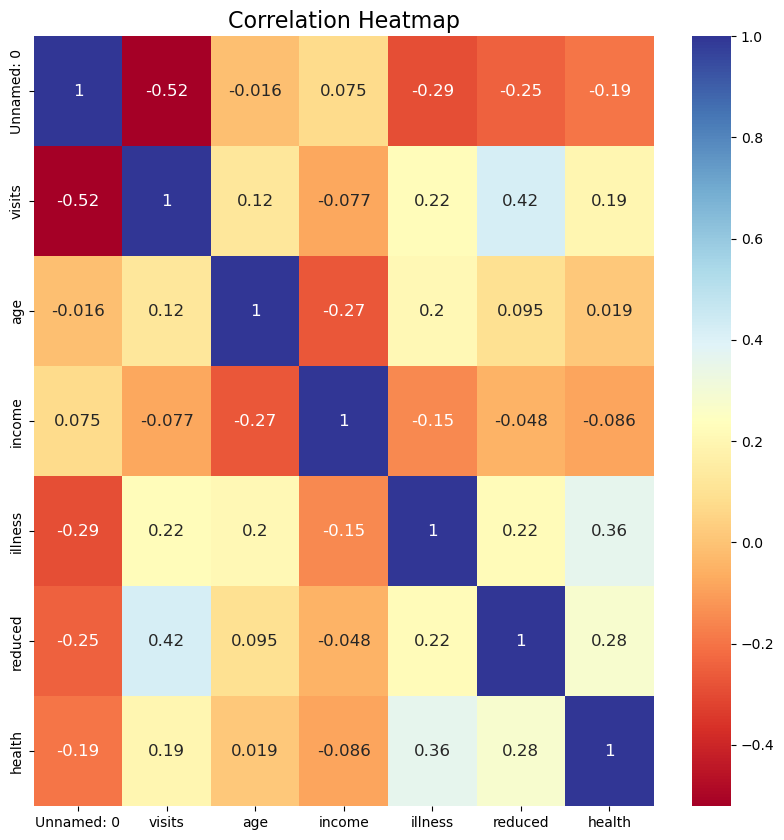

In [18]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='RdYlBu', annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


<Axes: xlabel='gender', ylabel='Count'>

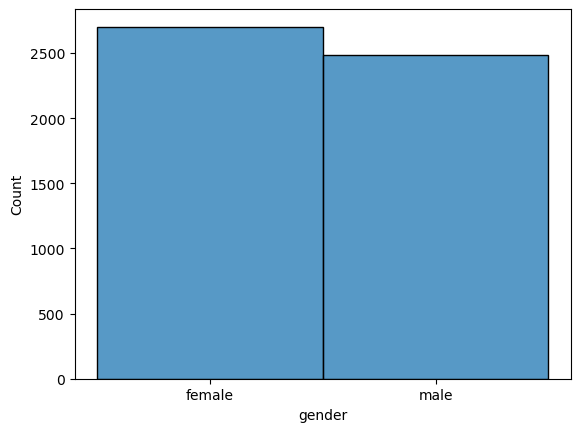

In [21]:
sns.histplot(df.gender,bins=2)

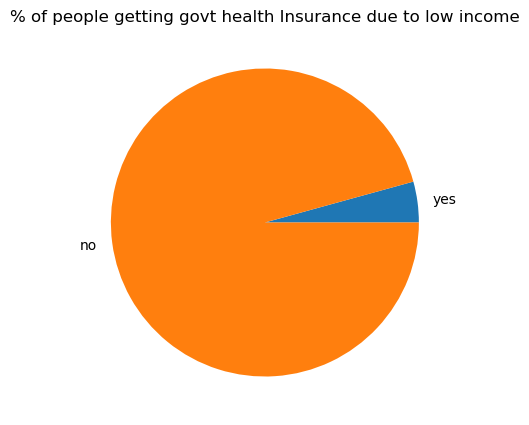

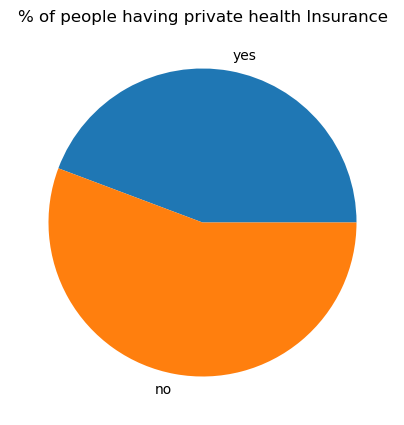

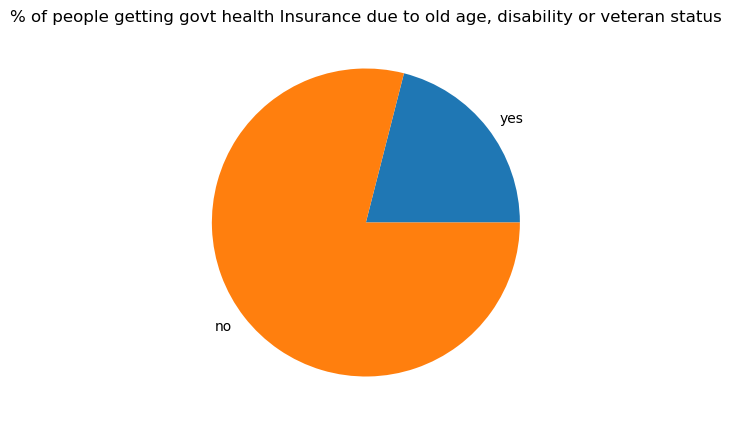

In [22]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()
Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people having private health Insurance")
plt.show()
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status")
plt.show()